# Practical Python Programming for Biologists
Author: Dr. Daniel Pass | www.CompassBioinformatics.com

---

# A quick bit of maths

We will always end up doing some calculations in our coding. The classic opperators apply and work as you would expect (```  +  -  /  *  ```), but to note some more specific cases:
- ```**``` - Exponent (To the power of).

 e.g. ```7 ** 2 = 49```
- ```%``` - Modulo. Return just the remainder of a division.

 e.g. ```17 % 5 = 2```

Lets see whether our gene has a perfect amino acid translation. 3 bases per codon so our modulo would return zero if perfect:

In [ ]:
my_ORF = "ATGGTACGACTCACATCACATGCATCGTCAACTTC"

print("There are", len(my_ORF) % 3, "bases not in a codon")


We can also use the opperators (```+ - * /```) together with assigning a variable (```=```) as a shortcut to change it's current value. We do this by combining a maths operator with the equals:
  ```  +=     -=     *=    /=  ```

For example these perform the same function, but one is quicker and easier:

In [ ]:
# The slow way
total = 27
total_plus3 = total + 3
total_plus_3_div_2 = total_plus3 / 2
total = total_plus_3_div_2

print(total)

# The fast way!
total = 27
total += 3
total /= 2       # Note how any division returns a float

print(total)

Acting alone they don't do too much, but in the context of loops they are super powerful!

# Looping

Really, we know loops are the powerhouse of programming. We have looked at lists, ranges, and dictionaries which have lots of data in them but untill we can run through the full dataset we aren't using them fully.

Running through a collection (term used for any kind of itterable set of data) mostly follows a simple pattern:

```
for item in list:
  do_something(item)
```

Some other coding languanges you may have seen will require an extra character to define your temporary variable but that's not needed in python. Nice and clean!

Python also doesn't use any of those messy parentheses ```[{()}]``` or semi-colons ```;```. You just have to be sure to use tabs/spaces to indent your code blocks. If your code has mixed up indents then it will error.

---

Lets use a for loop to perform a calculation on a list of DNA strings. As you can see once you define the temporary variable after the ```for``` then it can be used as you would any variable.

**Exercise**: try printing ```seq``` outside of the loop and check what you get back.



In [2]:
# Output the length & GC% for a list of DNA sequences
sequences = ["ATGCTGACTATATGAATCGTTTGA", "GCTAGCTAGCTAGCTAGCTG", "CTGACGATCGTACGACTGATCG","ATCGCGCGCGCGCCCTATACG"]

for seq in sequences:
    gc_count = seq.count("G") + seq.count("C")
    length = len(seq)
    PCrounded = round(gc_count / length *100, 2)
    print("Sequence:", seq, "is", length, "bases long with GC%:", PCrounded)

Sequence: ATGCTGACTATATGAATCGTTTGA is 24 bases long with GC%: 33.33
Sequence: GCTAGCTAGCTAGCTAGCTG is 20 bases long with GC%: 55.0
Sequence: CTGACGATCGTACGACTGATCG is 22 bases long with GC%: 54.55
Sequence: ATCGCGCGCGCGCCCTATACG is 21 bases long with GC%: 71.43


Inside a loop, any variable name that is created is temporary. We can also add to global variables which exist outside of the temporary loop.

Lets modify our code so that each time we run through the loop we will add the calculated value to the global variable. Once we've finished with the loop then we can do our calculation on the totals.

In [3]:
# Create the empty variables first
total_GC_count = 0
total_length = 0

for seq in sequences:
    gc_count = seq.count("G") + seq.count("C")
    length = len(seq)
    PCrounded = round(gc_count / length *100, 2)

    # We are adding the temporary variable to the global variable
    total_GC_count += gc_count
    total_length += length

    print("This sequence's GC%:", PCrounded)
    print("Adding:", gc_count, "\t| New total GC count is:", total_GC_count)
    print("Adding:", length, "\t| New total len is:", total_length)
    print()

print("~~~~~~~~~\nOutside the loop now")
print("Total average GC%:", round(total_GC_count / total_length * 100, 2))

This sequence's GC%: 33.33
Adding: 8 	| New total GC count is: 8
Adding: 24 	| New total len is: 24

This sequence's GC%: 55.0
Adding: 11 	| New total GC count is: 19
Adding: 20 	| New total len is: 44

This sequence's GC%: 54.55
Adding: 12 	| New total GC count is: 31
Adding: 22 	| New total len is: 66

This sequence's GC%: 71.43
Adding: 15 	| New total GC count is: 46
Adding: 21 	| New total len is: 87

~~~~~~~~~
Outside the loop now
Total average GC%: 52.87


One notable method we can use is looping through a string. It doesn't come in very useful in normal programming, but in bioinformatics we spend a lot of time with strings and sequences!

To work on each individual character in a string:

In [4]:
my_gene = "ACCCACACCGTGTG"

count = 0

for base in my_gene:
  count += 1
  print("Base number", count, "is a", base)

print("We had", count, "bases!")

Base number 1 is a A
Base number 2 is a C
Base number 3 is a C
Base number 4 is a C
Base number 5 is a A
Base number 6 is a C
Base number 7 is a A
Base number 8 is a C
Base number 9 is a C
Base number 10 is a G
Base number 11 is a T
Base number 12 is a G
Base number 13 is a T
Base number 14 is a G
We had 14 bases!


## Exercises - Looping

We've been out butterfly hunting! For Science!

1. Create a loop that outputs each value in one butterfly list (pick your favourite!) - print each value out
2. Create a ```total_count = 0``` before the loop, and add to it inside the loop
3. After the loop, output the sum and average of the butterfly list. Test it with different lists

Doing that for each species individually would take a long time, so we can do a 2D list and make it much quicker!

4. Create a loop for ```all_butterflies_list``` and put your code from the first parts inside of it, to run for all lists

In [6]:
# Species and counts per day (Mon/Tues/Weds/Thurs/Fri)
Monarch_count = [78, 70, 13, 17, 99]
Swallowtail_count = [6, 16, 44, 50, 44]
PaintedLady_count = [69, 27, 30, 74, 10]
Admiral_count = [66, 87, 74, 49, 65]
Peacock_count = [74, 78, 55, 70, 86]

all_butterflies_list = [Monarch_count, Swallowtail_count, PaintedLady_count, Admiral_count, Peacock_count]

In [20]:
total_count = 0

for bcount in Peacock_count:
  print(bcount)
  total_count += bcount


print(total_count/ len(Peacock_count))
print ("-----")

total_count = 0

for b_list in all_butterflies_list:

  b_count = 0

  for b_item in b_list:
     # print(bcount)
     b_count += b_item

  print("Butterfly count is", b_count)

print("Total count is", total_count)

74
78
55
70
86
72.6
-----
Butterfly count is 277
Butterfly count is 160
Butterfly count is 210
Butterfly count is 341
Butterfly count is 363
Total count is 0


One obvious issue here is that we don't have the name of each list so the output is a bit confusing. This is where a dictionary would be more useful than a loop.

**Extension**: Put the list data into a dictionary and create a more readable output by printing the key along with the sum/average for each butterfly. (remember dict.items(), and the next section on looping with tuples will help)

### Looping & tuples

We saw the format for assigning tuple elements to variable names yesterday, but it wasn't too useful then. Lets see how much better it is in a loop

Here we have a list of tuples with their ID, sequence, and abundance value, and can assign them variable names in the first line of the for loop:

In [22]:
binding_sites = [
    ("TFBS1", "CGTATTATCG", 80),
    ("TFBS2", "ACGTATCGTATTA", 120),
    ("TFBS3", "CTAGGTTA", 90),
    ("TFBS4", "TATTACGTA", 40),
    ("TFBS5", "ATGCTTACG", 110)
]

for ID, seq, abun in binding_sites:
    print("ID", ID, "has abundance", abun)

ID TFBS1 has abundance 80
ID TFBS2 has abundance 120
ID TFBS3 has abundance 90
ID TFBS4 has abundance 40
ID TFBS5 has abundance 110


# While

Using the ```while``` function we can create loops in a slightly different way. Basically we say "if this is true, keep repeating". For example:

In [23]:
count = 0

while count < 5:
  print(count)       ## Don't forget we start at zero!
  count +=1

0
1
2
3
4


An important thing to watch out for with while loops is accidentally creating infinity! Run this and see what happens. What went wrong?

In [24]:
count = 0

while count >= 0:
  print(count)
  count +=1

Streaming output truncated to the last 5000 lines.
1556973
1556974
1556975
1556976
1556977
1556978
1556979
1556980
1556981
1556982
1556983
1556984
1556985
1556986
1556987
1556988
1556989
1556990
1556991
1556992
1556993
1556994
1556995
1556996
1556997
1556998
1556999
1557000
1557001
1557002
1557003
1557004
1557005
1557006
1557007
1557008
1557009
1557010
1557011
1557012
1557013
1557014
1557015
1557016
1557017
1557018
1557019
1557020
1557021
1557022
1557023
1557024
1557025
1557026
1557027
1557028
1557029
1557030
1557031
1557032
1557033
1557034
1557035
1557036
1557037
1557038
1557039
1557040
1557041
1557042
1557043
1557044
1557045
1557046
1557047
1557048
1557049
1557050
1557051
1557052
1557053
1557054
1557055
1557056
1557057
1557058
1557059
1557060
1557061
1557062
1557063
1557064
1557065
1557066
1557067
1557068
1557069
1557070
1557071
1557072
1557073
1557074
1557075
1557076
1557077
1557078
1557079
1557080
1557081
1557082
1557083
1557084
1557085
1557086
1557087
1557088
1557089
1557090
15570

KeyboardInterrupt: 

We can also use ```while``` to run through lists. It gives us an advantage in running until a condition is met, or getting and modifying the index value.

As we run a while loop for the length of our list, lets use it to access elements of other lists. Note: Here we are assuming our lists are in the same order and the same length! Not the best assumption to make with real data!

In [ ]:
expression = [2.3, 4.1, 5.7, 3.9, 6.5]
genes = ['BRCA1', 'TP53', 'EGFR', 'KRAS', 'MET1']
species = ['Arabidopsis', 'Bos taurus', 'C. elegans', 'Drosophila', 'E. coli']
threshold = 5.0
index = 0

while index < len(expression):
  print(genes[index], expression[index], species[index])

  index += 1

---
## Advanced looping

This next section is going to use if statments in it. Although we're only using basic if's, if you've not done the IF section yet, do that first before continuing to make sure you understand how it works fully.

### Loop control
If we start running through a loop, it will continue to the end. If our objective is "Do X for every item in list" then that is good however, sometimes we don't want that to happen and once we have reached the data we want then we can stop, or skip that turn

- ```continue``` - Move on to the next element in the loop immediately - don't do any more code on this itteration
- ```break``` - Stop the loop right now, do no more processing

In [ ]:
gene_list = ["RB1", "PIK3CA", "BRAF", "HOX2", "JAK2", "HOX5", "NOTCH1", "FLT3", "KRAS", "EGFR", "PTEN", "HOX1", "BRAF", "PIK3CA", "HOX9", "JAK2"]

print("Skipping HOX genes:")
for gene in gene_list:
    if "HOX" in gene:
        # Don't do anything, just move on to next element
        continue
    print(gene)

# Note here it stops before printing anything else on that loop
print("\nStopping if I find HOX5:")
for gene in gene_list:
    if "HOX5" in gene:
        # Stop the loop!
        break
    print(gene)


Skipping HOX genes:
RB1
PIK3CA
BRAF
JAK2
NOTCH1
FLT3
KRAS
EGFR
PTEN
BRAF
PIK3CA
JAK2

Stopping if I find HOX5:
RB1
PIK3CA
BRAF
HOX2
JAK2


## Exercise - Loop control

When we did our quality filtering earlier, the data was designed to not raise above 20 after going below. But that's not realistic! Here is some more variable data.

- Use your code from earlier (The While section) and include a ```break``` condition to stop looping when it first goes below 20

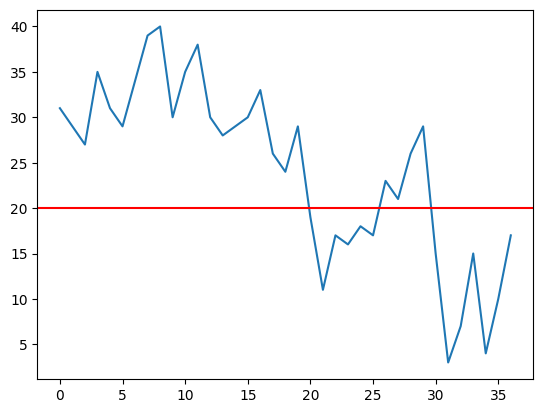

In [ ]:
sequence = "TGCATGACTGCATCGATCGTACGATCGATCGATCGAT"
quality = [31, 29, 27, 35, 31, 29, 34, 39, 40, 30, 35, 38, 30, 28, 29, 30, 33, 26, 24, 29, 19, 11, 17, 16, 18, 17, 23, 21, 26, 29, 15, 3, 7, 15, 4, 10, 17]

import matplotlib.pyplot as plt

plt.plot(range(len(quality)), quality)
plt.axhline(20, color = "red")
plt.show()

In [ ]:
# Your code


Full: TGCATGACTGCATCGATCGTACGATCGATCGATCGAT
Trim: TGCATGACTGCATCGATCGT


# Exercise - Loops, lists, and ifs
**Objective**: Take our list of genes and output the most up/down regulated genes with key information

This exercise is the most dificult we've done and will need you to use lists, loops, ifs, and dictionaries! It is not supposed to be simple and probably will take 10-20 minutes.

Suggested steps:

1.   Make empty lists for your up/down gene lists
2.   Make a loop to run through the list of gene expression values and use if/else to build your lists
3.   Itterate through your new lists and use the dictionary to report if they have been qPCR tested
4.   Output in a clean text format such as:

"Here we tested X genes resulting in Y upregulated and Z downregulated. qPCR confirmed A and B respectively. Here is the full list:"


**Extension:** Filter the data to greater than +/- 2 expression. What % of genes are removed by this filter?


In [ ]:
# Data for your analysis
gene_list = ["TP53", "BRCA1", "EGFR", "KRAS", "MYC", "PTEN", "CDKN2A", "AKT1", "ERBB2", "RB1", "PIK3CA", "BRAF", "MET", "JAK2", "MAPK1", "NOTCH1", "FLT3", "KRAS", "EGFR", "PTEN", "TP53", "BRAF", "PIK3CA", "MYC", "ERBB2", "RB1", "AKT1", "CDKN2A", "MAPK1", "JAK2"]
gene_exp = [['TP53', -1.4245], ['BRCA1', 4.0941], ['EGFR', 1.8266], ['KRAS', -0.8996], ['MYC', -2.1188], ['PTEN', -1.8499], ['CDKN2A', 4.2798], ['AKT1', 0.4709], ['ERBB2', 2.144], ['RB1', 4.7541], ['PIK3CA', 2.6291], ['BRAF', 2.1514], ['MET', 0.2558], ['JAK2', 5.0332], ['MAPK1', 5.295], ['NOTCH1', 2.5695], ['FLT3', 5.3211], ['KRAS', 3.064], ['EGFR', 0.1768], ['PTEN', -0.4923], ['TP53', -4.7796], ['BRAF', -3.8257], ['PIK3CA', 0.3357], ['MYC', -0.0917], ['ERBB2', -3.2586], ['RB1', -0.7903], ['AKT1', 0.6729], ['CDKN2A', 5.8131], ['MAPK1', -4.9549], ['JAK2', -0.936]]
qPCR_status = {'TP53': False, 'BRCA1': False, 'EGFR': True, 'KRAS': False, 'MYC': True, 'PTEN': True, 'CDKN2A': False, 'AKT1': True, 'ERBB2': False, 'RB1': False, 'PIK3CA': True, 'BRAF': False, 'MET': False, 'JAK2': True, 'MAPK1': False, 'NOTCH1': False, 'FLT3': True}


In [ ]:
# Your code here


Here we tested 30 genes resulting in 18 upregulated and 12 downregulated. qPCR confirmed 8 and 5 respectively.
Here is the full list:

qPCR confirmed upregulated genes
EGFR
AKT1
PIK3CA
JAK2
FLT3
EGFR
PIK3CA
AKT1

qPCR confirmed downregulated genes
MYC
PTEN
PTEN
MYC
JAK2
